In [1]:
import smallcode as sc
import xarray as xr
import geopandas as gpd
import pandas as pd

In [2]:
# read file and calculate yearly average, convert to celsius and center map around Greenwich
with sc.read_data('../data/cds_monthly_t2m_ssr_1940-present.nc', timespan=("2000-01","2022-12"), expver=1) as tmp:
    yt = sc.yearly_means(tmp)
sc.kelvin_to_celsius(yt, 't2m')
yt=sc.center_longitude0(yt)

In [3]:
geoyt=sc.convert_to_geopandas(yt)

In [4]:
geoyt.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
africa = sc.load_worldgdf(continent='Africa')

/home/yacine/tutos/small_code/src/smallcode/geo.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


In [6]:
africa_means = sc.t2m_mean_per_country(geoyt, africa)

<Axes: >

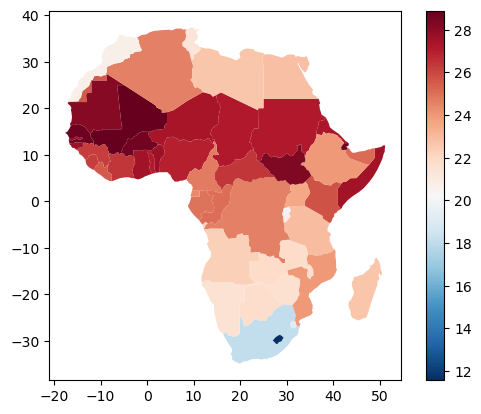

In [7]:
africa_means[africa_means.year==2022].plot(column='t2m', cmap='RdBu_r', legend=True)
#Mali was the hottest country in Africa in 2022

<Axes: xlabel='year'>

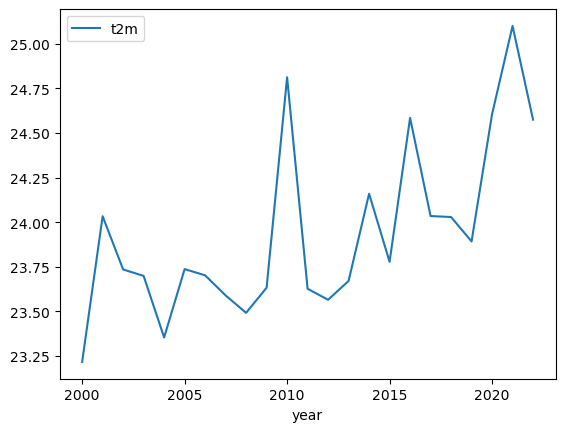

In [14]:
africa_means[africa_means.name=='Algeria'].plot(kind='line',x='year',y='t2m')

In [17]:
# test 2 Europe
europe = sc.load_worldgdf(continent='Europe')
europe_means = sc.t2m_mean_per_country(geoyt, europe)


/home/yacine/tutos/small_code/src/smallcode/geo.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_filepath = gpd.datasets.get_path('naturalearth_lowres')


Text(0.5, 1.0, 'Average temperatures in Europe per country in 2022')

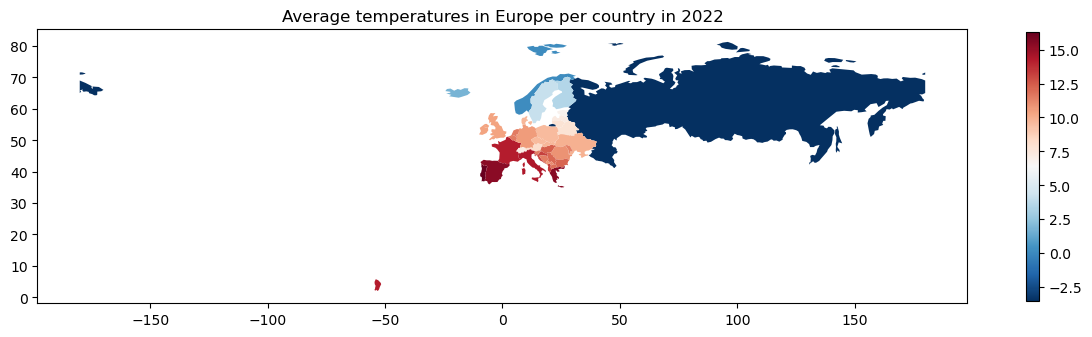

In [25]:
ax = europe_means[europe_means.year==2022].plot(column='t2m', cmap='RdBu_r', legend=True, figsize = (15,7),legend_kwds={'shrink': 0.5})
ax.set_title('Average temperatures in Europe per country in 2022')